In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse
from PIL import Image


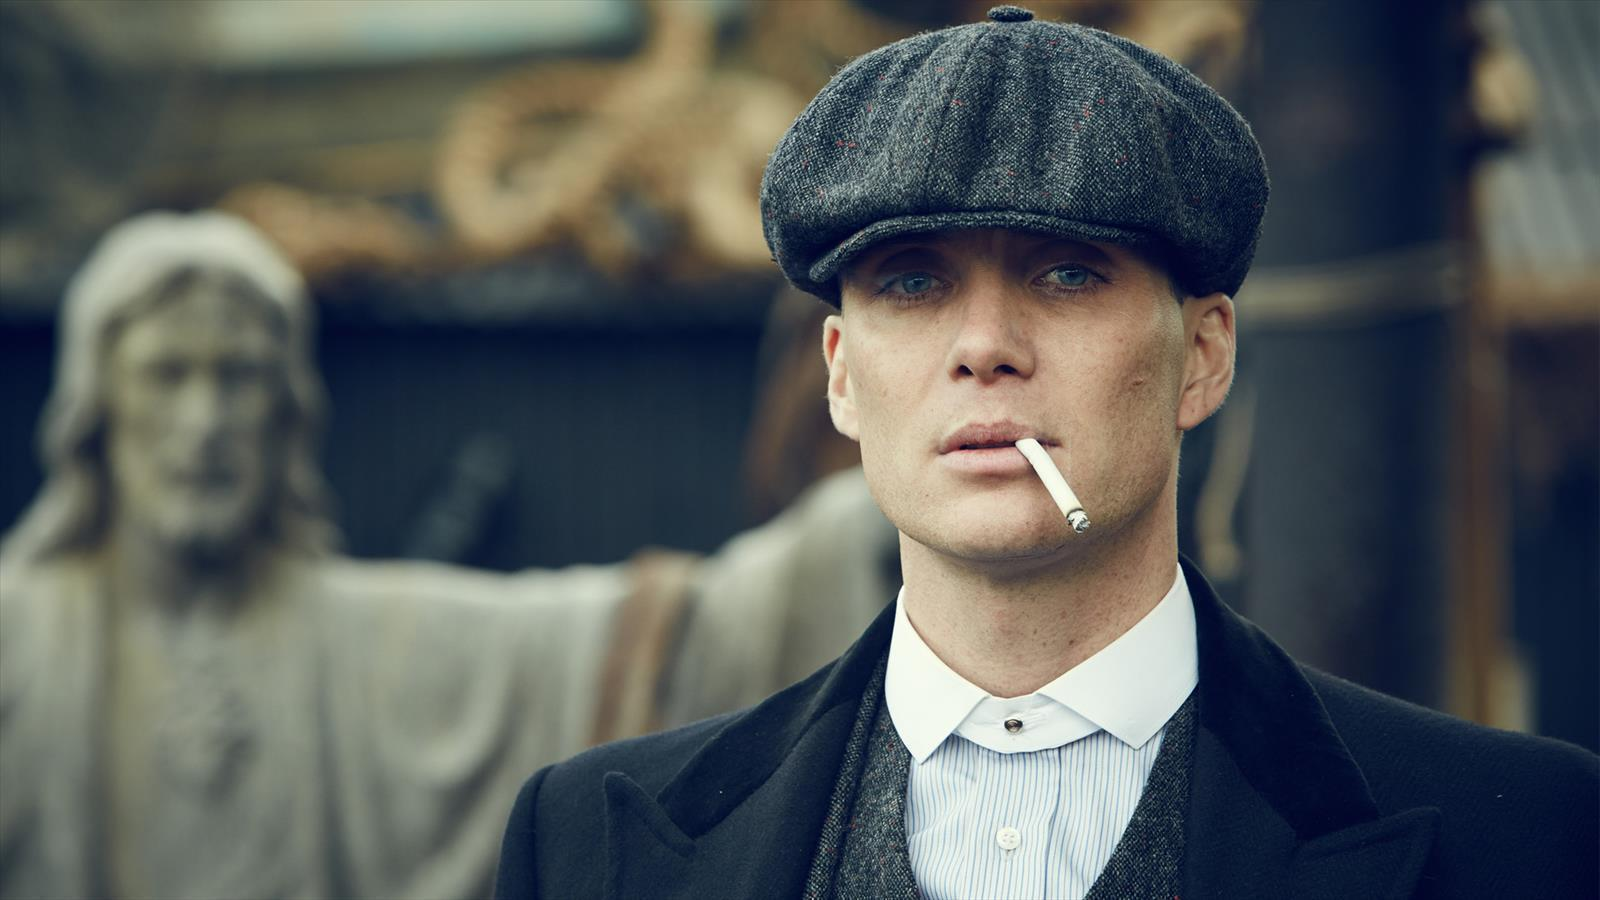

In [18]:
# Load the image

image = Image.open('ThomasShelby2.jpg')
# Simulating a random 1920x2400 colored image (3 channels: RGB)
# 1841 1227
# 1600 900
# 1365 2048

image

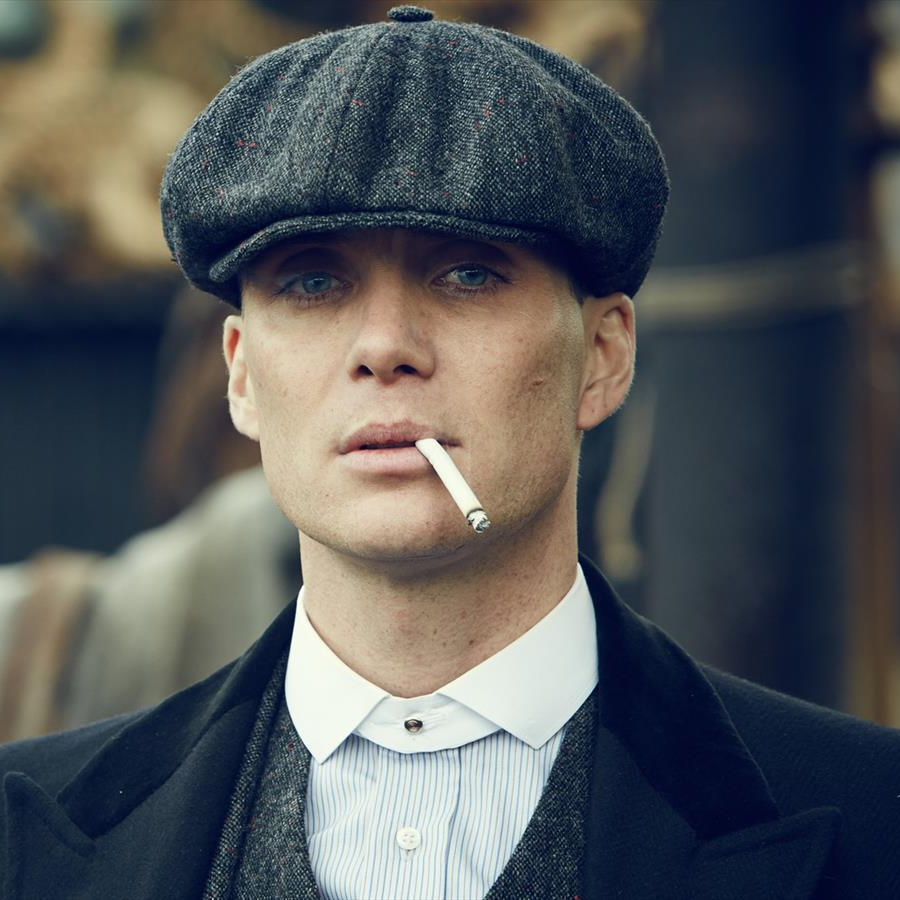

In [19]:

# Define the crop area (left, upper, right, lower)
# For example, to crop a 50x50 segment starting at (1000, 1200)

patch_location_x = 600
patch_location_y = 0

patch_size_x = 900
patch_size_y = 900
crop_area = (patch_location_x, patch_location_y, patch_location_x+patch_size_x, patch_location_y+patch_size_y)

# Crop the image
cropped_image = image.crop(crop_area)
cropped_image2 = image.crop(crop_area)

# Save or display the cropped image
# cropped_image.show()  # To display
cropped_image.save('cropped_image.png')  # To save the cropped image

cropped_image


In [36]:

# Parameters
# N = 50  # Patch size
r_values = [50]  # Different ranks for low-rank approximation 
# r_values = [5]
learning_rate = 0.000001
iterations = 20000

# Generating a random 50x50 patch for the simulation
np.random.seed(42)
original_patch = cropped_image  # Simulating the image patch


In [37]:
cropped_image_np = np.array(cropped_image)

# Split the image into R, G, B channels
def getRGB(cropped_image_np):
    R = cropped_image_np[:, :, 0]  # Red channel
    G = cropped_image_np[:, :, 1]  # Green channel
    B = cropped_image_np[:, :, 2]  # Blue channel

    # Now R, G, B are separate 2D arrays representing the color channels
    # print("Red Channel Shape:", R.shape)
    # print("Green Channel Shape:", G.shape)
    # print("Blue Channel Shape:", B.shape)
    
    return R,G,B


In [38]:

scale = 1
# Function to perform gradient descent to factorize matrix into W and H
def matrix_factorization(P, r, lr=learning_rate, iterations=iterations):
    N = P.shape[0]
    # Random initialization of W and H
    W = np.random.rand(N, r)*scale
    H = np.random.rand(r, N)*scale
    # 0.1 multiplied for small random values
    
    for _ in range(iterations):
        # Compute the gradient for W and H
        gradient_W = -2 * (P - W @ H) @ H.T
        gradient_H = -2 * W.T @ (P - W @ H)
        
        # Update W and H
        W -= lr * gradient_W
        H -= lr * gradient_H
        
        # W = np.nan_to_num(W, nan=0.0, posinf=255, neginf= 0)
        # H = np.nan_to_num(H, nan=0.0, posinf=255, neginf= 0)
        
        W = np.clip(W, 0, 255)
        H = np.clip(H, 0, 255)
    
    return W, H


In [39]:
# Prediction Matrix


R,G,B = getRGB(cropped_image_np)

# print(R.shape, B.shape)

In [40]:

# Evaluate RMSE and PSNR for each r
rmse_values = []
psnr_values = []
reconstructed_patches = []
height, width = B.shape
datatype = B.dtype

for r in r_values:
    # Get the shape of the r, g, b arrays


# Create an empty array with shape (height, width, 3) to hold the RGB image
    reconstructed_patch_np = np.zeros((height, width, 3), dtype= int)

    # Factorize the original patch
    WR, HR = matrix_factorization(R, r)
    WG, HG = matrix_factorization(G, r)
    WB, HB = matrix_factorization(B, r)
    
    # Reconstruct the patch
    reconstructed_patch_R = WR @ HR 
    reconstructed_patch_G = WG @ HG 
    reconstructed_patch_B = WB @ HB 
    
    # Assign the r, g, b arrays to the appropriate channels
    reconstructed_patch_np[:, :, 0] = reconstructed_patch_R  # Red channel
    reconstructed_patch_np[:, :, 1] = reconstructed_patch_G  # Green channel
    reconstructed_patch_np[:, :, 2] = reconstructed_patch_B  # Blue channel
    
    # print(reconstructed_patch_np)
    # reconstructed_patch = Image.fromarray(reconstructed_patch_np)
    # reconstructed_patch.show()
    reconstructed_patches.append(reconstructed_patch_np)
    
    # Compute RMSE
    rmse_value = np.sqrt(mse(cropped_image_np, reconstructed_patch_np))
    rmse_values.append(rmse_value)
    
    # Compute PSNR
    psnr_value = psnr(cropped_image_np, reconstructed_patch_np, data_range=1.0)  # max pixel value is 1.0
    psnr_values.append(psnr_value)
    
    
# r values vs time
# 5 -  10 min
# 10 - 19 min
# 20 - 10  min


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


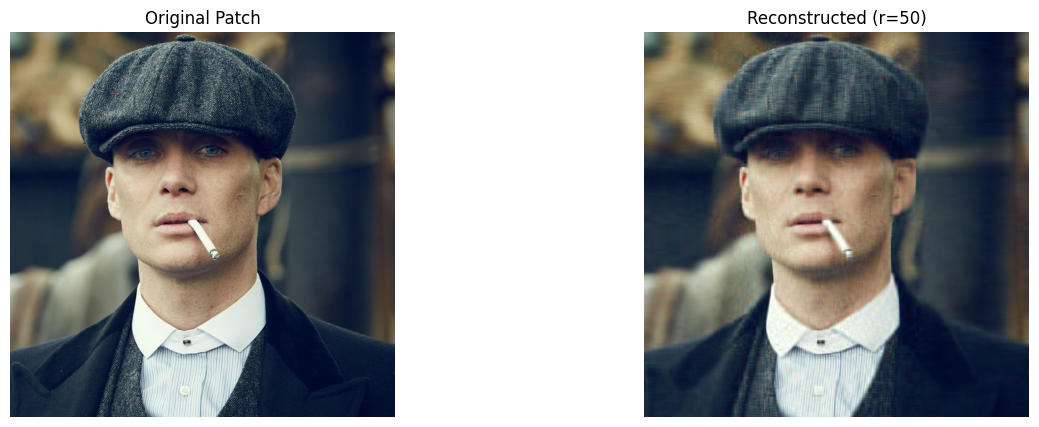

 For r = 50, the RMSE is 10.399, the PSNR is -20.34


In [41]:

# Plot original and reconstructed patches
fig, axes = plt.subplots(1, len(r_values) + 1, figsize=(15, 5))
axes[0].imshow(original_patch, cmap='gray')
axes[0].set_title('Original Patch')
axes[0].axis('off')

for i, r in enumerate(r_values):
    axes[i+1].imshow(reconstructed_patches[i], cmap='gray')
    axes[i+1].set_title(f'Reconstructed (r={r})')
    axes[i+1].axis('off')

plt.show()

# rmse_values, psnr_values

for i in range(len(r_values)):
    print(f" For r = {r_values[i]}, the RMSE is {round(rmse_values[i], 3)}, the PSNR is {round(psnr_values[i], 3)}")


In [42]:
print(cropped_image_np)


[[[136 158 145]
  [135 157 144]
  [133 157 144]
  ...
  [ 77  86  83]
  [ 76  87  83]
  [ 76  87  83]]

 [[147 169 156]
  [147 169 156]
  [145 169 156]
  ...
  [ 87  96  93]
  [ 86  97  93]
  [ 86  97  93]]

 [[149 171 158]
  [149 171 158]
  [147 171 158]
  ...
  [ 89  98  93]
  [ 89  98  95]
  [ 90  99  96]]

 ...

 [[ 24  39  58]
  [ 23  38  57]
  [ 24  39  58]
  ...
  [  4  15  47]
  [  2  13  45]
  [  1  12  44]]

 [[ 23  38  57]
  [ 25  40  59]
  [ 28  43  62]
  ...
  [  4  15  47]
  [  2  13  45]
  [  1  12  44]]

 [[ 22  37  56]
  [ 27  42  61]
  [ 32  47  66]
  ...
  [  4  15  47]
  [  2  13  45]
  [  1  12  44]]]


In [43]:
print(reconstructed_patches[0])

[[[136 157 136]
  [135 156 135]
  [134 156 135]
  ...
  [ 78  91  90]
  [ 78  91  92]
  [ 78  93  92]]

 [[147 168 149]
  [146 168 149]
  [145 167 149]
  ...
  [ 87  99  97]
  [ 87 100  99]
  [ 87 101  99]]

 [[148 169 151]
  [146 168 150]
  [145 168 150]
  ...
  [ 90 100  98]
  [ 90 101 100]
  [ 90 102 101]]

 ...

 [[ 32  40  58]
  [ 31  39  57]
  [ 30  40  57]
  ...
  [  5  11  47]
  [  5  12  47]
  [  5  12  47]]

 [[ 28  39  56]
  [ 27  37  54]
  [ 27  38  54]
  ...
  [  7  12  44]
  [  8  13  44]
  [  8  13  45]]

 [[ 27  37  54]
  [ 27  35  53]
  [ 26  36  54]
  ...
  [  6  12  43]
  [  6  13  43]
  [  7  13  43]]]


For r = 20, the RMSE is 13.746, the PSNR is -22.763, epoch = 10000 time 10 min
For r = 50, the RMSE is 10.574, the PSNR is -20.485 epoch = 10000 time 10 min
For r = 50, the RMSE is 10.399, the PSNR is -20.34 epoch = 20000 time 14 min
